In [1]:
import os
import sys
import pandas as pd
#from openpyxl import Workbook
from os import walk
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import math
import openpyxl
from scipy import stats

# Figure 4A

In [3]:
data = pd.read_excel('Tables/SI Table10.xlsx',skiprows=2)

In [4]:
# Calculate Mean & std for each sample both for GFP and normalized GFP
averages = []
for x in list(dict.fromkeys(data.ID.to_list())):
    sub = data[data['ID']==x]
    averages.append([x,sub.GFP.mean(),sub.GFP.std(),sub.Norm.mean(),sub.Norm.std(),sub.shape[0]])

In [ ]:
df_avg = pd.DataFrame(averages,columns=['TF_ID','Avg_GFP','Std_GFP','Avg_Norm','Std_Norm','#disks'])

In [ ]:
df_avg = df_avg.sort_values(by='Avg_Norm',ascending=True)

In [ ]:
order = df_avg['TF_ID'].to_list()

/Users/NFHummel/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/NFHummel/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/NFHummel/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/NFHummel/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/NFHummel/opt/miniconda3/lib/pytho

<Axes: xlabel='ID', ylabel='Norm'>

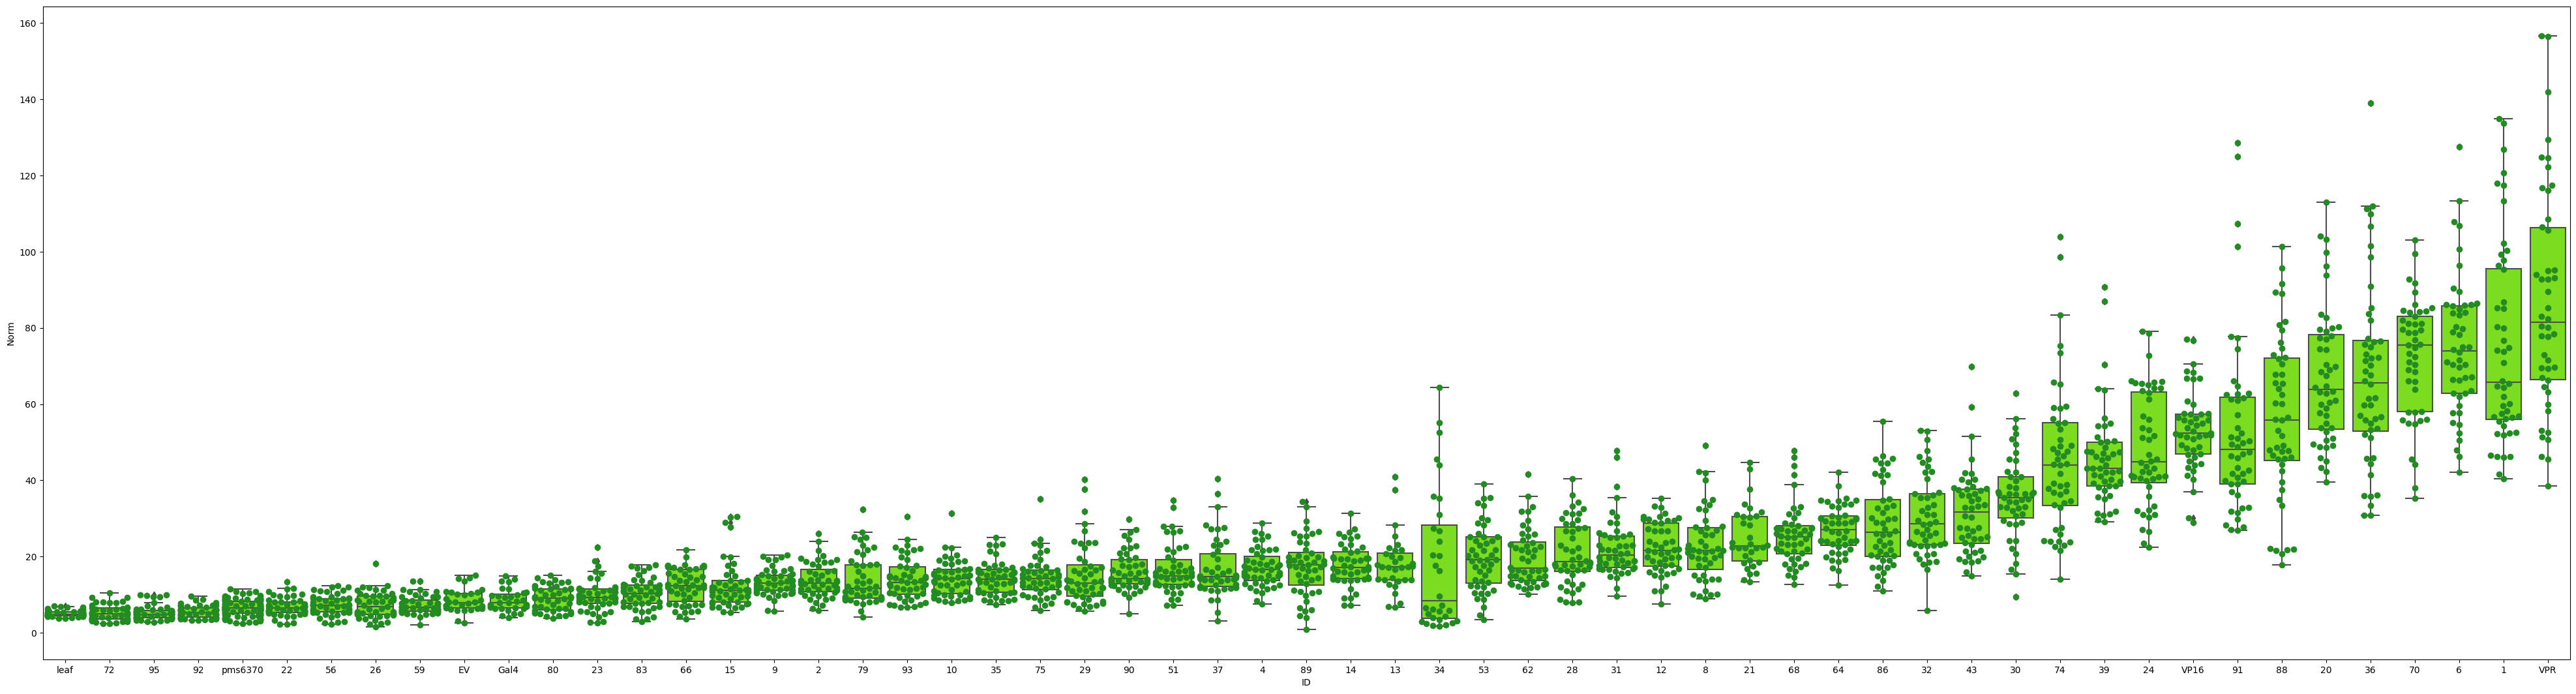

In [13]:
plt.figure(figsize=(50,13))
sns.boxplot(data=data,y='Norm',x='ID',color = 'lawngreen',order=order)
sns.swarmplot(data=data,y='Norm',x='ID', color='forestgreen',order=order,size=7 )
#plt.savefig('Figure4_A')

# Statistics

In [ ]:
candidates = list(dict.fromkeys(data.ID.to_list()))
from scipy.stats import mannwhitneyu
stats_norm = []
for x in candidates:
    sampleA = data[data['ID']==x]['Norm'].to_list()
    sampleB = data[data['ID']=='pms6370']['Norm'].to_list()
    U1, p = mannwhitneyu(sampleA, sampleB, method="exact")
    boolean = False
    #bonferroni correction
    if p<0.05/56:
        boolean = True
        stats_norm.append([x,U1,p,boolean])
    else:
        stats_norm.append([x,U1,p,boolean])

In [ ]:
stats_norm

In [ ]:
candidates = list(dict.fromkeys(data.ID.to_list()))
from scipy.stats import mannwhitneyu
stats_norm = []
for x in candidates:
    sampleA = data[data['ID']==x]['Norm'].to_list()
    sampleB = data[data['ID']=='VP16']['Norm'].to_list()
    U1, p = mannwhitneyu(sampleA, sampleB, method="exact")
    boolean = False
    #bonferroni correction
    if p<0.05/56:
        boolean = True
        stats_norm.append([x,U1,p,boolean])
    else:
        stats_norm.append([x,U1,p,boolean])

In [ ]:
stats_norm

In [ ]:
candidates = list(dict.fromkeys(data.ID.to_list()))
from scipy.stats import mannwhitneyu
stats_norm = []
for x in candidates:
    sampleA = data[data['ID']==x]['Norm'].to_list()
    sampleB = data[data['ID']=='VPR']['Norm'].to_list()
    U1, p = mannwhitneyu(sampleA, sampleB, method="exact")
    boolean = False
    #bonferroni correction
    if p<0.05/56:
        boolean = True
        stats_norm.append([x,U1,p,boolean])
    else:
        stats_norm.append([x,U1,p,boolean])

In [ ]:
stats_norm

# Figure 4B

In [15]:
data1 = df_avg[~df_avg['TF_ID'].isin(['VPR','leaf','EV','Gal4','pms6370','VP16'])]

(97.0, 0.0)

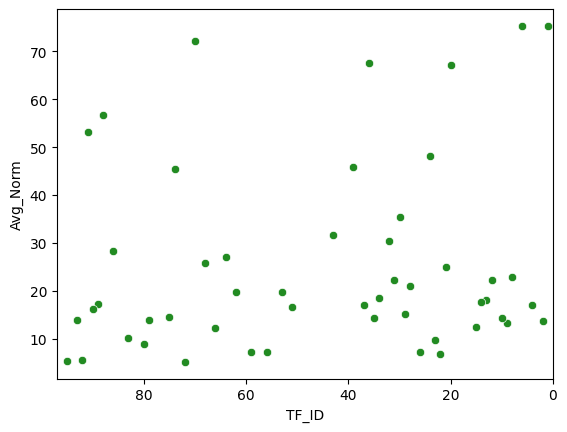

In [16]:
sns.scatterplot(data1,x=data1.sort_values(by='TF_ID',ascending=True).TF_ID,y=data1.sort_values(by='TF_ID',ascending=True)['Avg_Norm'],color='forestgreen')
plt.xlim(97,0)
#plt.savefig('Figure 4B.pdf')

In [17]:
stats.spearmanr(data1.sort_values(by='TF_ID',ascending=True).TF_ID,data1.sort_values(by='TF_ID',ascending=True)['Avg_Norm'])

SpearmanrResult(correlation=-0.16886877828054297, pvalue=0.23617669189107016)

# Figure 4C

In [36]:
predictions = pd.read_excel('Tables/SI Table4.xlsx',skiprows=2)

In [ ]:
# Calculate Mean & std for each sample both for GFP and normalized GFP
averages = []
for x in list(dict.fromkeys(data.ID.to_list())):
    sub = data[data['ID']==x]
    averages.append([x,sub.GFP.mean(),sub.GFP.std(),sub.Norm.mean(),sub.Norm.std(),sub.shape[0]])

In [ ]:
df_avg = pd.DataFrame(averages,columns=['TF_ID','Avg_GFP','Std_GFP','Avg_Norm','Std_Norm','#disks'])

In [ ]:
df_avg = df_avg.sort_values(by='Avg_Norm',ascending=True)

In [37]:
df_avg = df_avg.rename(columns={'TF_ID':'Real_ID'})

In [40]:
info = pd.read_excel('Tables/SI Table9.xlsx',skiprows=2)

In [41]:
info = info.rename(columns={'ID':'Real_ID'})

In [43]:
df = pd.merge(df_avg,info,how='left',on='Real_ID')

In [45]:
fin = pd.merge(df,predictions,how='left',on='protein')

In [47]:
controls = ['VPR','leaf','Gal4','EV','pms6370','VP16']

In [48]:
fin = fin[~fin['Real_ID'].isin(controls)]

<Axes: xlabel='log2_predicted_activity', ylabel='Avg_Norm'>

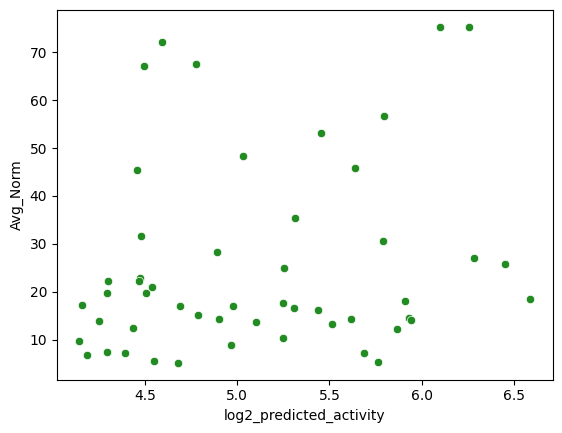

In [50]:
# Figure 4C
sns.scatterplot(fin,x=fin.sort_values(by='Real_ID',ascending=True).log2_predicted_activity,y=fin.sort_values(by='Real_ID',ascending=True).Avg_Norm,color='forestgreen')
#plt.savefig('Figure_4C.pdf')

In [52]:
stats.spearmanr(fin.sort_values(by='Real_ID',ascending=True).log2_predicted_activity,fin.sort_values(by='Real_ID',ascending=True).Avg_Norm)

SpearmanrResult(correlation=0.20452488687782805, pvalue=0.14996409990011522)